# Modellvergleich basierend auf dem $F_1$-Score
Dieses Notebook lädt die Metrikdaten aus einer CSV-Datei und visualisiert die F1-Scores der Testdaten als Balkendiagramm.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [85]:
# CSV-Datei einlesen (angepasst auf Semikolon als Trennzeichen)
mean_df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/crossValidation/mean_values_crossValidation.csv", sep=",") #change to semicolon if needed
std_df = pd.read_csv("/Users/I566184/bachelorarbeit_coding/mesogeos/csv/crossValidation/std_values_crossValidation.csv", sep=",") #change to semicolon if needed
score = "F1_Training"  # Der Score, der für die Visualisierung verwendet wird

In [86]:
mean_df

,Abbreviations,F1_Training,F1_Validation,F1_Testing,AUCPR_Training,AUCPR_Validation,AUCPR_Testing
0,RF,0.983999,0.746053,0.751735,0.998956,0.843252,0.841199
1,CNN,0.796122,0.796122,0.788019,0.860022,0.860022,0.857089
2,MLP,0.811846,0.811846,0.805153,0.885205,0.885205,0.878071
3,LSTM,0.813372,0.813372,0.805137,0.884679,0.884679,0.876242
4,GRU,0.808862,0.808862,0.800572,0.881954,0.881954,0.874135
5,GTN,0.819039,0.819039,0.807866,0.887439,0.887439,0.882754
6,TFT,0.811340,0.811340,0.801551,0.885149,0.885149,0.877083
7,Transformer,0.819077,0.819077,0.812343,0.889747,0.889747,0.886204


In [87]:
std_df

,Abbreviations,F1_Training,F1_Validation,F1_Testing,AUCPR_Training,AUCPR_Validation,AUCPR_Testing
0,MLP,0.024596,0.024596,0.020380,0.024726,0.024726,0.021371
1,CNN,0.021605,0.021605,0.021384,0.023274,0.023274,0.018623
2,LSTM,0.017950,0.017950,0.015434,0.023958,0.023958,0.020124
3,GRU,0.020700,0.020700,0.020249,0.025310,0.025310,0.023379
4,Transformer,0.023614,0.023614,0.017975,0.025551,0.025551,0.016709
5,GTN,0.023383,0.023383,0.018113,0.022844,0.022844,0.016571
6,TFT,0.022673,0.022673,0.021066,0.024899,0.024899,0.015125
7,RF,0.000852,0.057174,0.028656,0.000093,0.027739,0.024635


In [92]:
merge_df = pd.merge(mean_df, std_df, on="Abbreviations", suffixes=('_mean', '_std'))
merge_df = merge_df.sort_values(by='F1_Testing_mean', ascending=True)  
merge_df

,Abbreviations,F1_Training_mean,F1_Validation_mean,F1_Testing_mean,AUCPR_Training_mean,AUCPR_Validation_mean,AUCPR_Testing_mean,F1_Training_std,F1_Validation_std,F1_Testing_std,AUCPR_Training_std,AUCPR_Validation_std,AUCPR_Testing_std
0,RF,0.983999,0.746053,0.751735,0.998956,0.843252,0.841199,0.000852,0.057174,0.028656,0.000093,0.027739,0.024635
1,CNN,0.796122,0.796122,0.788019,0.860022,0.860022,0.857089,0.021605,0.021605,0.021384,0.023274,0.023274,0.018623
4,GRU,0.808862,0.808862,0.800572,0.881954,0.881954,0.874135,0.020700,0.020700,0.020249,0.025310,0.025310,0.023379
6,TFT,0.811340,0.811340,0.801551,0.885149,0.885149,0.877083,0.022673,0.022673,0.021066,0.024899,0.024899,0.015125
3,LSTM,0.813372,0.813372,0.805137,0.884679,0.884679,0.876242,0.017950,0.017950,0.015434,0.023958,0.023958,0.020124
2,MLP,0.811846,0.811846,0.805153,0.885205,0.885205,0.878071,0.024596,0.024596,0.020380,0.024726,0.024726,0.021371
5,GTN,0.819039,0.819039,0.807866,0.887439,0.887439,0.882754,0.023383,0.023383,0.018113,0.022844,0.022844,0.016571
7,Transformer,0.819077,0.819077,0.812343,0.889747,0.889747,0.886204,0.023614,0.023614,0.017975,0.025551,0.025551,0.016709


In [76]:
f1_df = mean_df[["Abbreviations", score, "F1_Testing"]].copy()
f1_df = f1_df.sort_values(by='F1_Testing', ascending=True)  # 🔁 aufsteigend sortieren
f1_df

,Abbreviations,F1_Training,F1_Testing
0,RF,0.983999,0.751735
1,CNN,0.796122,0.788019
4,GRU,0.808862,0.800572
6,TFT,0.811340,0.801551
3,LSTM,0.813372,0.805137
2,MLP,0.811846,0.805153
5,GTN,0.819039,0.807866
7,Transformer,0.819077,0.812343


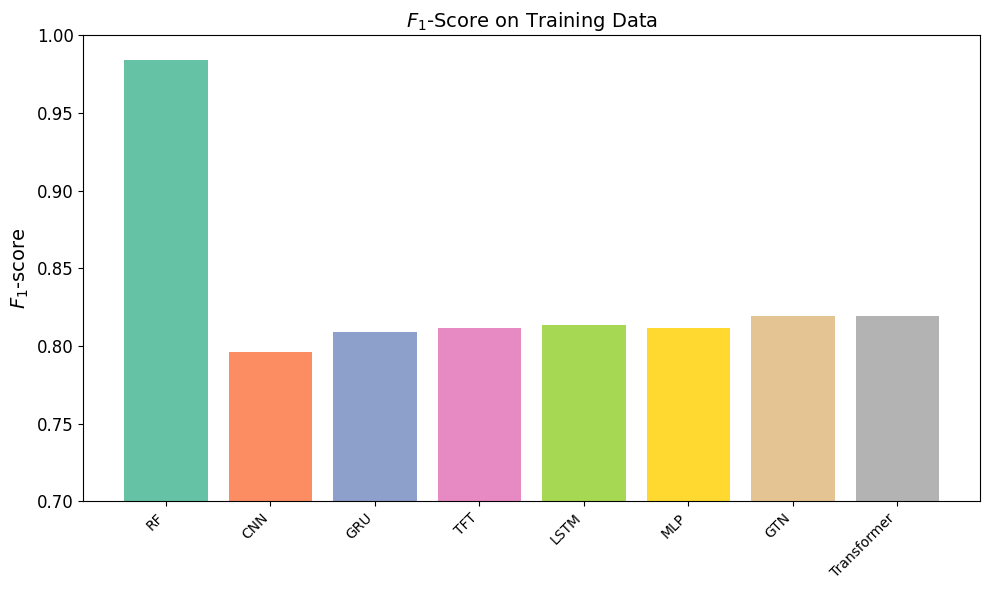

In [77]:
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_df["Abbreviations"], f1_df[score], color=plt.cm.Set2.colors) #plt.cm.Pastel1.colors

plt.ylabel("$F_1$-score", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=12)
plt.ylim(0.7, 1.00) #adapt the y-axis limits as needed
plt.title("$F_1$-Score on Training Data", fontsize=14)
plt.tight_layout()
plt.show()


In [100]:
def create_mean_std_plot(data):
    score = f"F1_{data}_mean"
    score_std = f"F1_{data}_std"
    
    plt.figure(figsize=(10, 6))
    
    bars = plt.bar(
        merge_df["Abbreviations"],
        merge_df[score],
        yerr=merge_df[score_std],         
        capsize=5,                     
        color=plt.cm.Set2.colors
    )
    
    plt.ylabel("$F_1$-score", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=12)
    plt.ylim(0.5, 1.00)  # ggf. anpassen
    plt.title(f"$F_1$-Score on Cross-Validated {data} Splits", fontsize=14)
    plt.tight_layout()
    plt.show()


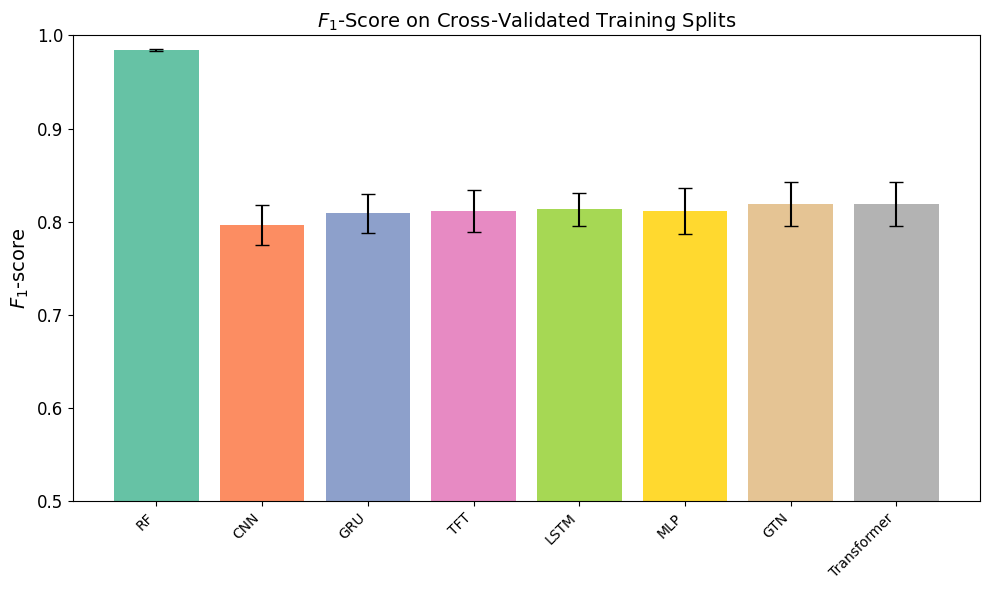

In [101]:
create_mean_std_plot("Training")

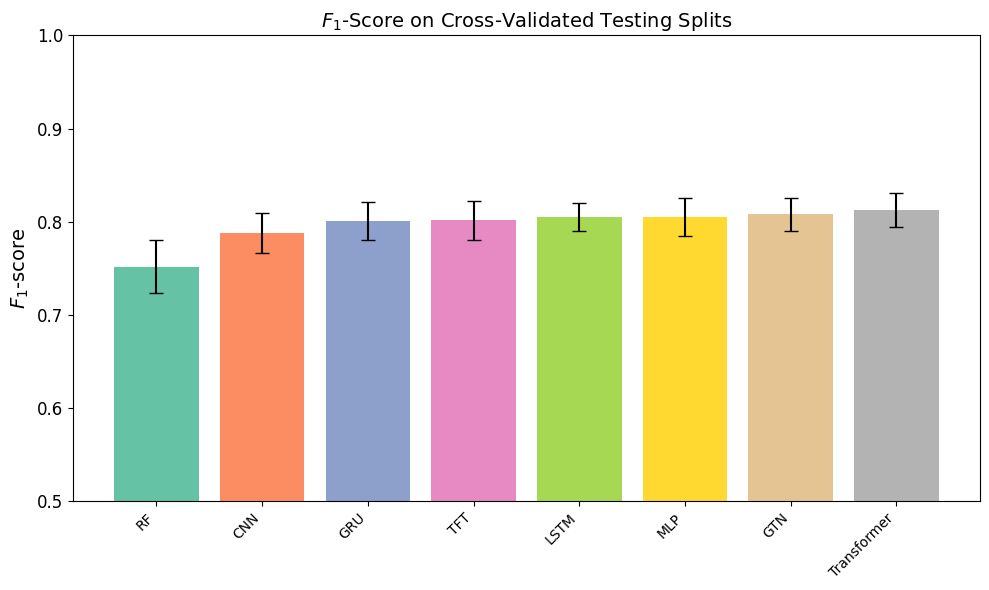

In [102]:
create_mean_std_plot("Testing")

  Abbreviations  F1_Training_mean  F1_Validation_mean  F1_Testing_mean
0            RF          0.983999            0.746053         0.751735
1           CNN          0.796122            0.796122         0.788019
4           GRU          0.808862            0.808862         0.800572
6           TFT          0.811340            0.811340         0.801551
3          LSTM          0.813372            0.813372         0.805137
2           MLP          0.811846            0.811846         0.805153
5           GTN          0.819039            0.819039         0.807866
7   Transformer          0.819077            0.819077         0.812343


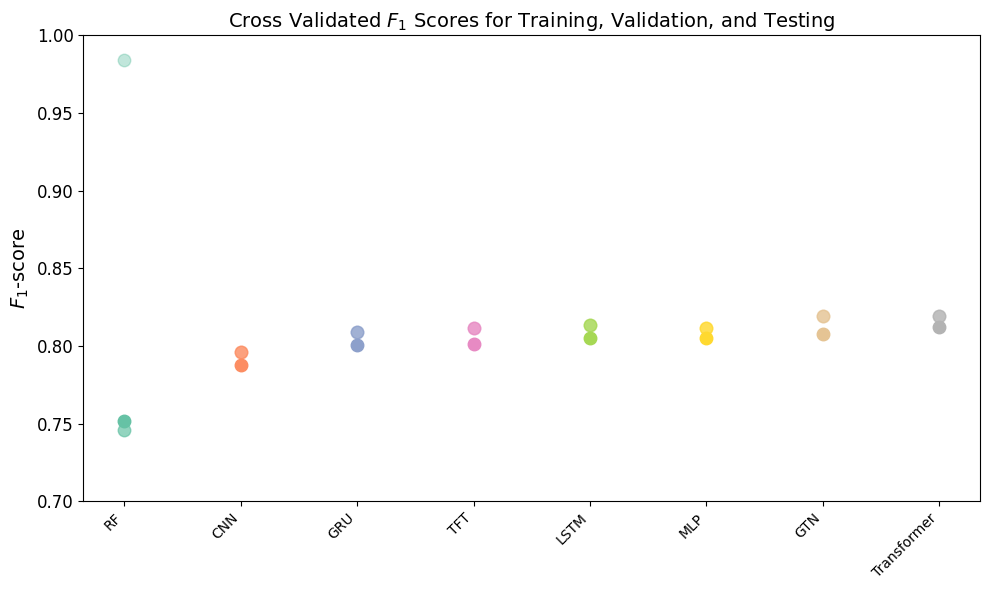

In [109]:
def plot_f1_score_points(df, model_col="Abbreviations"):
    df = df.sort_values(by='F1_Testing_mean', ascending=True).reset_index(drop=True)
    base_colors = plt.cm.Set2.colors  #plt.cm.Pastel1.colors
    n_models = len(df)
    base_colors = base_colors[:n_models]

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        scores = [row["F1_Training_mean"], row["F1_Validation_mean"], row["F1_Testing_mean"]]
        color = base_colors[i]

        # Punkte für Training, Validation, Testing mit abgestufter Transparenz
        ax.plot(x, scores[0], 'o', color=color, alpha=0.4, markersize=9, label="_nolegend_")  # Training
        ax.plot(x, scores[1], 'o', color=color, alpha=0.7, markersize=9, label="_nolegend_")  # Validation
        ax.plot(x, scores[2], 'o', color=color, alpha=1.0, markersize=9, label="_nolegend_")  # Testing

    ax.set_xticks(np.arange(n_models))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=10)
    ax.set_ylabel("$F_1$-score", fontsize=14)
    ax.set_ylim(0.7, 1.0)
    ax.set_title("Cross Validated $F_1$ Scores for Training, Validation, and Testing", fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.tight_layout()
    plt.show()

# Anwendung
print(merge_df[["Abbreviations", "F1_Training_mean", "F1_Validation_mean", "F1_Testing_mean"]])

plot_f1_score_points(merge_df)